# Task - 4

- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?

DataSet - https://bit.ly/2TK5Xn5

#### Presented by - Pranjal Gupta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb

In [2]:
#df = pd.read_csv("C:/Users/Pranjal Gupta/Downloads/globalterrorismdb_0718dist.csv")
file="C:/Users/Pranjal Gupta/Downloads/globalterrorismdb_0718dist.csv"

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

In [4]:
df = pd.read_csv(file,encoding='ISO-8859-1')
df.head()

D:\Anaconda setup\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
pd.isnull(df).sum().values

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

## Data Cleaning and Formatting

There are a lot of columns present in the data which have a lot of null/empty values and that are not in any direct relation with the other columns that we need for our analysis, hence it would be a good place to start by removing these columns.

In [8]:
df1 = df[['eventid', 'iyear', 'imonth', 'iday','country_txt','region_txt', 'city','specificity',
       'vicinity', 'location','success','attacktype1_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname',
        'motive','weaptype1_txt','propextent_txt','nkill','nwound']]
df1.head()

eventid  iyear  imonth  iday         country_txt  \
0  197000000001   1970       7     2  Dominican Republic   
1  197000000002   1970       0     0              Mexico   
2  197001000001   1970       1     0         Philippines   
3  197001000002   1970       1     0              Greece   
4  197001000003   1970       1     0               Japan   

                    region_txt           city  specificity  vicinity location  \
0  Central America & Caribbean  Santo Domingo          1.0         0      NaN   
1                North America    Mexico city          1.0         0      NaN   
2               Southeast Asia        Unknown          4.0         0      NaN   
3               Western Europe         Athens          1.0         0      NaN   
4                    East Asia        Fukouka          1.0         0      NaN   

   ...                 attacktype1_txt                targtype1_txt  \
0  ...                   Assassination  Private Citizens & Property   
1  ...     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2  ...                   Assassination          Journalists & Media   
3  ...               Bombing/Explosion      Government (Diplomatic)   
4  ...  Facility/Infrastructure Attack      Government (Diplomatic)   

                                    targsubtype1_txt         natlty1_txt  \
0                                     Named Civilian  Dominican Republic   
1  Diplomatic Personnel (outside of embassy, cons...             Belgium   
2                    Radio Journalist/Staff/Facility       United States   
3                                  Embassy/Consulate       United States   
4                                  Embassy/Consulate       United States   

                                gname motive weaptype1_txt propextent_txt  \
0                              MANO-D    NaN       Unknown            NaN   
1  23rd of September Communist League    NaN       Unknown            NaN   
2                             Unknown    NaN       Unknown            NaN   
3                             Unknown    NaN    Explosives            NaN   
4                             Unknown    NaN    Incendiary            NaN   

  nkill  nwound  
0   1.0     0.0  
1   0.0     0.0  
2   1.0     0.0  
3   NaN     NaN  
4   NaN     NaN  

[5 rows x 21 columns]

In [9]:
df1 = df1.set_index('eventid')

In [10]:
df1.shape

(181691, 20)

In [11]:
df1.rename(columns = {'iyear':'year' ,
            'imonth':'month',
            'iday':'day',
            'country_txt':'country',
            'region_txt':'region',
            'attacktype1_txt':'attack_type',
            'targtype1_txt':'target',
            'targsubtype1_txt':'target-sub division',
            'natlty1_txt':'nationality',
            'gname':'gang name',
            'weaptype1_txt':'weapon type',
            'propextent_txt':'property destruction',
            'nkill':'no of killed',
            'nwound':'no of wounded'},
            inplace=True)
df1.head()

year  month  day             country  \
eventid                                              
197000000001  1970      7    2  Dominican Republic   
197000000002  1970      0    0              Mexico   
197001000001  1970      1    0         Philippines   
197001000002  1970      1    0              Greece   
197001000003  1970      1    0               Japan   

                                   region           city  specificity  \
eventid                                                                 
197000000001  Central America & Caribbean  Santo Domingo          1.0   
197000000002                North America    Mexico city          1.0   
197001000001               Southeast Asia        Unknown          4.0   
197001000002               Western Europe         Athens          1.0   
197001000003                    East Asia        Fukouka          1.0   

              vicinity location  success                     attack_type  \
eventid                                                                    
197000000001         0      NaN        1                   Assassination   
197000000002         0      NaN        1     Hostage Taking (Kidnapping)   
197001000001         0      NaN        1                   Assassination   
197001000002         0      NaN        1               Bombing/Explosion   
197001000003         0      NaN        1  Facility/Infrastructure Attack   

                                   target  \
eventid                                     
197000000001  Private Citizens & Property   
197000000002      Government (Diplomatic)   
197001000001          Journalists & Media   
197001000002      Government (Diplomatic)   
197001000003      Government (Diplomatic)   

                                            target-sub division  \
eventid                                                           
197000000001                                     Named Civilian   
197000000002  Diplomatic Personnel (outside of embassy, cons...   
197001000001                    Radio Journalist/Staff/Facility   
197001000002                                  Embassy/Consulate   
197001000003                                  Embassy/Consulate   

                     nationality                           gang name motive  \
eventid                                                                       
197000000001  Dominican Republic                              MANO-D    NaN   
197000000002             Belgium  23rd of September Communist League    NaN   
197001000001       United States                             Unknown    NaN   
197001000002       United States                             Unknown    NaN   
197001000003       United States                             Unknown    NaN   

             weapon type property destruction  no of killed  no of wounded  
eventid                                                                     
197000000001     Unknown                  NaN           1.0            0.0  
197000000002     Unknown                  NaN           0.0            0.0  
197001000001     Unknown                  NaN           1.0            0.0  
197001000002  Explosives                  NaN           NaN            NaN  
197001000003  Incendiary                  NaN           NaN            NaN

In [12]:
df1.columns.values

array(['year', 'month', 'day', 'country', 'region', 'city', 'specificity',
       'vicinity', 'location', 'success', 'attack_type', 'target',
       'target-sub division', 'nationality', 'gang name', 'motive',
       'weapon type', 'property destruction', 'no of killed',
       'no of wounded'], dtype=object)

In [13]:
pd.isnull(df1).sum() #to find nulll values

year                         0
month                        0
day                          0
country                      0
region                       0
city                       434
specificity                  6
vicinity                     0
location                126196
success                      0
attack_type                  0
target                       0
target-sub division      10373
nationality               1559
gang name                    0
motive                  131130
weapon type                  0
property destruction    117626
no of killed             10313
no of wounded            16311
dtype: int64

 - As we can see the number of null data is a lot in various columns, but the null data in specific and more important ones like : year,country, region etc  to analyze the hotsposts is not present, hence we can move forward with data set by cleaning and formatting it a little more. 
 

 - But there are various other columns where null/unknown data is present, which can only be confirmed and filled by the verified data sources from which the data is taken. Any assumptions as such cannot be made on columns like : Nationaltity, motive, cities,gang name etc.

In [14]:
del df1['location']
del df1['property destruction']

m1=df1["no of killed"].mean()
m2=df1["no of wounded"].mean()
df1["no of killed"].replace(np.nan, m1, inplace=True)
df1["no of wounded"].replace(np.nan, m2, inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181691 entries, 197000000001 to 201712310032
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 181691 non-null  int64  
 1   month                181691 non-null  int64  
 2   day                  181691 non-null  int64  
 3   country              181691 non-null  object 
 4   region               181691 non-null  object 
 5   city                 181257 non-null  object 
 6   specificity          181685 non-null  float64
 7   vicinity             181691 non-null  int64  
 8   success              181691 non-null  int64  
 9   attack_type          181691 non-null  object 
 10  target               181691 non-null  object 
 11  target-sub division  171318 non-null  object 
 12  nationality          180132 non-null  object 
 13  gang name            181691 non-null  object 
 14  motive               50561 non-null   object 
 15  

In [15]:
df1.head()

year  month  day             country  \
eventid                                              
197000000001  1970      7    2  Dominican Republic   
197000000002  1970      0    0              Mexico   
197001000001  1970      1    0         Philippines   
197001000002  1970      1    0              Greece   
197001000003  1970      1    0               Japan   

                                   region           city  specificity  \
eventid                                                                 
197000000001  Central America & Caribbean  Santo Domingo          1.0   
197000000002                North America    Mexico city          1.0   
197001000001               Southeast Asia        Unknown          4.0   
197001000002               Western Europe         Athens          1.0   
197001000003                    East Asia        Fukouka          1.0   

              vicinity  success                     attack_type  \
eventid                                                           
197000000001         0        1                   Assassination   
197000000002         0        1     Hostage Taking (Kidnapping)   
197001000001         0        1                   Assassination   
197001000002         0        1               Bombing/Explosion   
197001000003         0        1  Facility/Infrastructure Attack   

                                   target  \
eventid                                     
197000000001  Private Citizens & Property   
197000000002      Government (Diplomatic)   
197001000001          Journalists & Media   
197001000002      Government (Diplomatic)   
197001000003      Government (Diplomatic)   

                                            target-sub division  \
eventid                                                           
197000000001                                     Named Civilian   
197000000002  Diplomatic Personnel (outside of embassy, cons...   
197001000001                    Radio Journalist/Staff/Facility   
197001000002                                  Embassy/Consulate   
197001000003                                  Embassy/Consulate   

                     nationality                           gang name motive  \
eventid                                                                       
197000000001  Dominican Republic                              MANO-D    NaN   
197000000002             Belgium  23rd of September Communist League    NaN   
197001000001       United States                             Unknown    NaN   
197001000002       United States                             Unknown    NaN   
197001000003       United States                             Unknown    NaN   

             weapon type  no of killed  no of wounded  
eventid                                                
197000000001     Unknown      1.000000       0.000000  
197000000002     Unknown      0.000000       0.000000  
197001000001     Unknown      1.000000       0.000000  
197001000002  Explosives      2.403272       3.167668  
197001000003  Incendiary      2.403272       3.167668

# Data Analysis

Now that we have cleaned and formatted the data we can proceed forward with the DA of the given data to answer the questions.
 - to find out the hot zone of terrorism.
 - All the other security issues and insights can be derived from the data set.

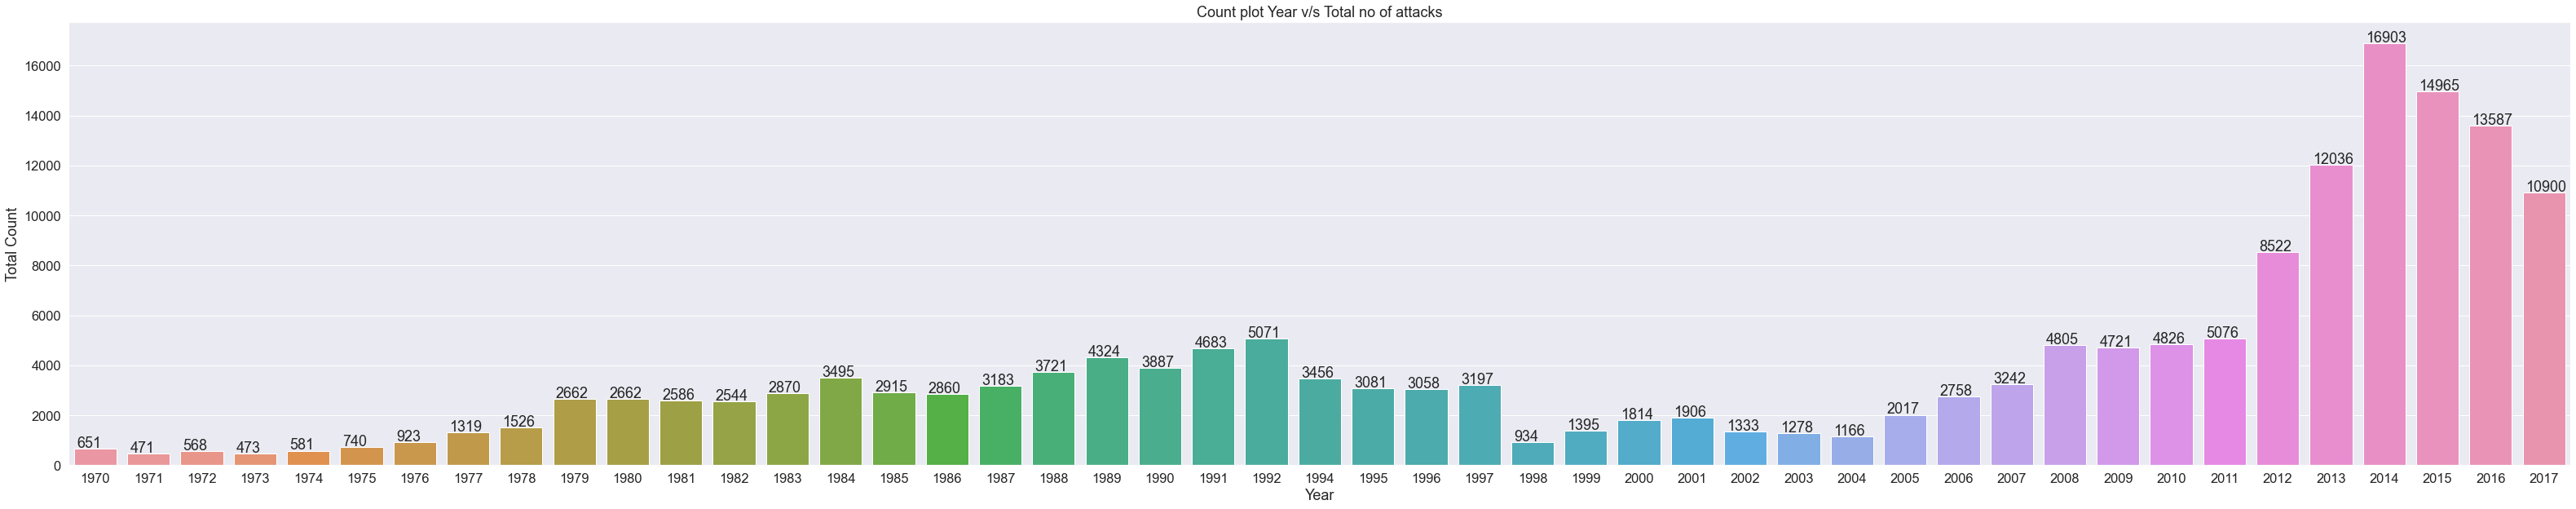

In [16]:
# to find the total no of attacks in each year

# df1['year'].value_counts() - to find the exact number
sb.set(font_scale=1.5)
plt.figure(figsize=[55,10])
ax=sb.countplot(x=df1['year'])
plt.title("Count plot Year v/s Total no of attacks")
plt.xlabel('Year')
plt.ylabel('Total Count')

# to display the count on each bar
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
        
plt.show()

Text(0, 0.5, 'Total Count')

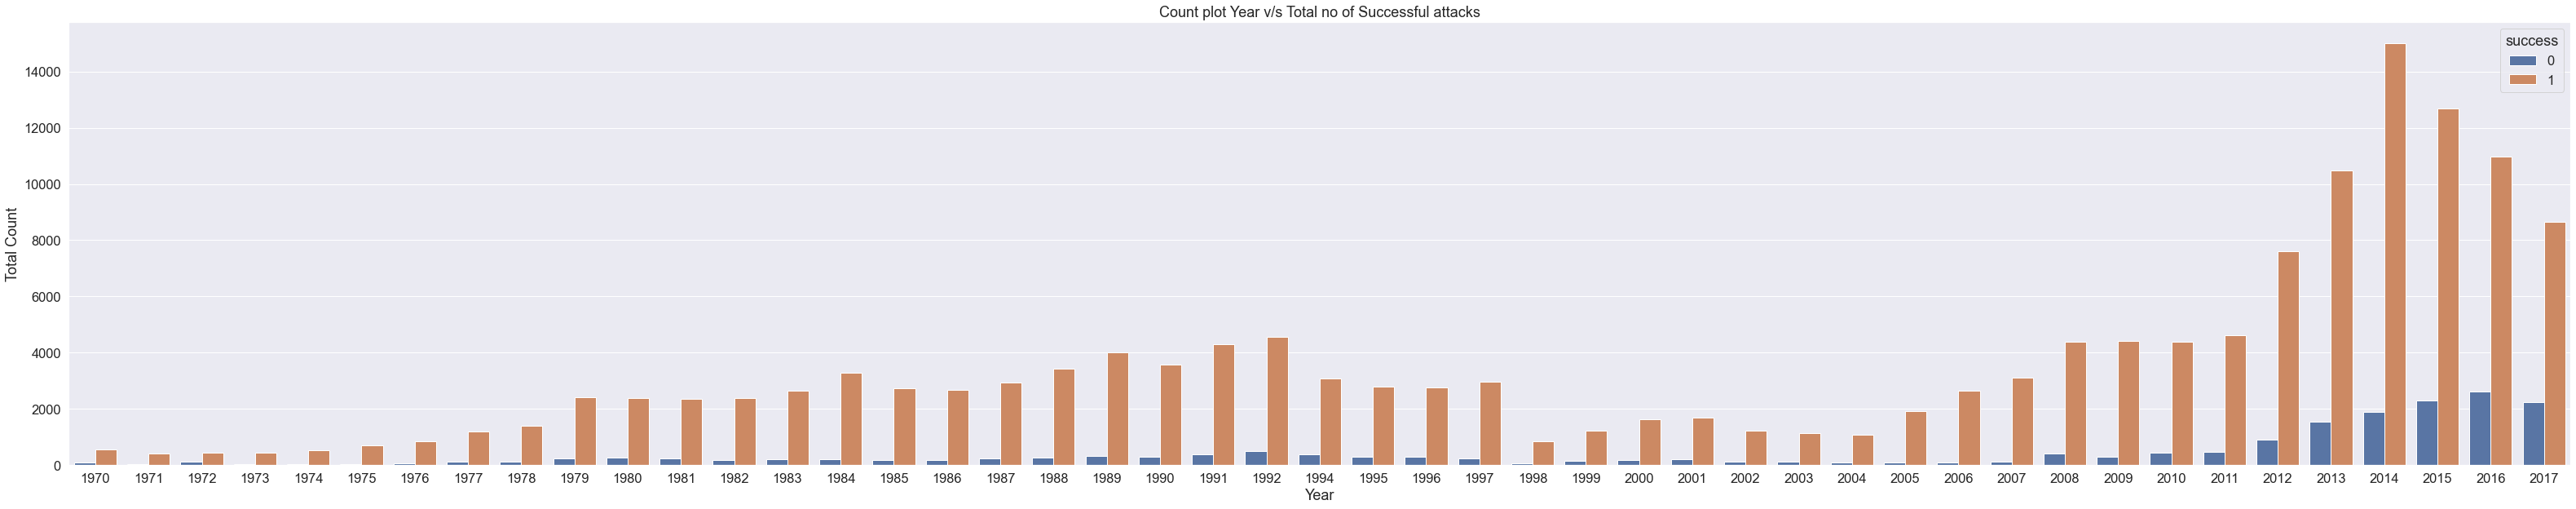

In [17]:
plt.figure(figsize=[55,10])
ax=sb.countplot(x=df1['year'],hue=df1['success'])
plt.title("Count plot Year v/s Total no of Successful attacks")
plt.xlabel('Year')
plt.ylabel('Total Count')

## Conclusion :
As we can see the the trend going, the highest no of attacks around the globe took place in the years between 2012-2017 with 2014 having the highest no of the attacks ever. Lets see now which region was the most affected till now. 

In [18]:
# we group the regions and the yearly success rate
df_group_one = df1[['region','success','year']]
df_group_one = df_group_one.groupby(['region','year'],as_index=False).mean()  
df_group_one.head()

region  year  success
0  Australasia & Oceania  1970     1.00
1  Australasia & Oceania  1971     1.00
2  Australasia & Oceania  1972     0.25
3  Australasia & Oceania  1973     1.00
4  Australasia & Oceania  1974     1.00

In [19]:
# pivot table to show all yearwise attacks and success or failure rates in the region
# where 1 = successful and 0 = not successful

grouped_pivot = df_group_one.pivot(index='year',columns='region')
grouped_pivot.head()

success                                           \
region Australasia & Oceania Central America & Caribbean Central Asia   
year                                                                    
1970                    1.00                    1.000000          NaN   
1971                    1.00                    0.800000          NaN   
1972                    0.25                    1.000000          NaN   
1973                    1.00                    0.666667          NaN   
1974                    1.00                    1.000000          NaN   

                                                                          \
region East Asia Eastern Europe Middle East & North Africa North America   
year                                                                       
1970         1.0            1.0                   0.821429      0.824153   
1971         1.0            0.8                   0.890909      0.866397   
1972         NaN            1.0                   0.509434      0.712329   
1973         1.0            1.0                   0.789474      0.875000   
1974         1.0            1.0                   0.928571      0.909910   

                                                                   \
region South America South Asia Southeast Asia Sub-Saharan Africa   
year                                                                
1970        0.923077        1.0       0.900000                1.0   
1971        1.000000        NaN       0.833333                1.0   
1972        0.545455        1.0       0.562500                0.0   
1973        0.939759        0.0       1.000000                1.0   
1974        0.962963        1.0       1.000000                1.0   

                       
region Western Europe  
year                   
1970         0.840000  
1971         0.928000  
1972         0.901596  
1973         0.931034  
1974         0.936909

Text(0.5, 156.453125, 'region')

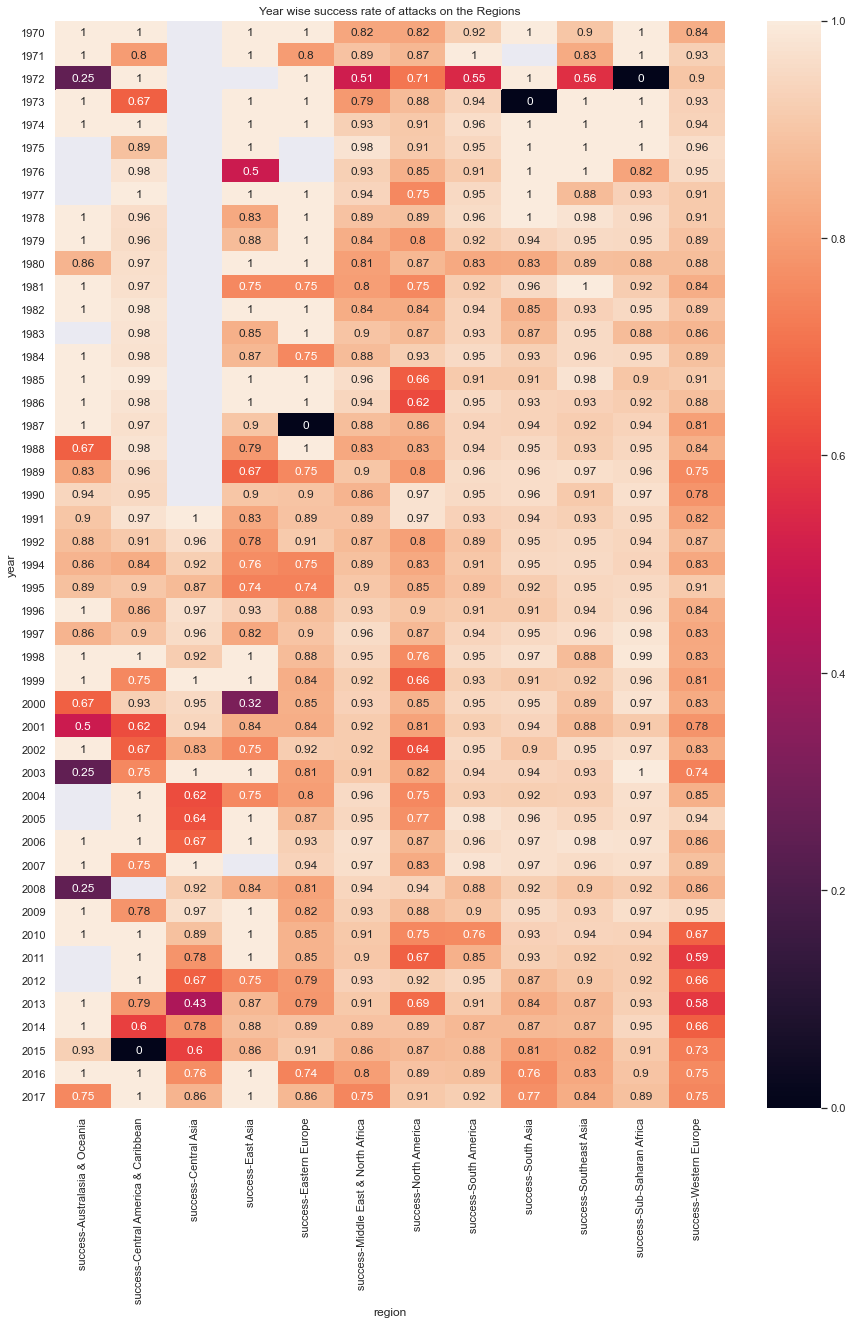

In [59]:
plt.figure(figsize=[15,20])
#fig, ax = plt.subplots(figsize=(20,40)) 
sb.set(font_scale=1)
sb.heatmap(grouped_pivot, annot=True)
plt.title("Year wise success rate of attacks on the Regions")
plt.ylabel('year')
plt.xlabel('region')

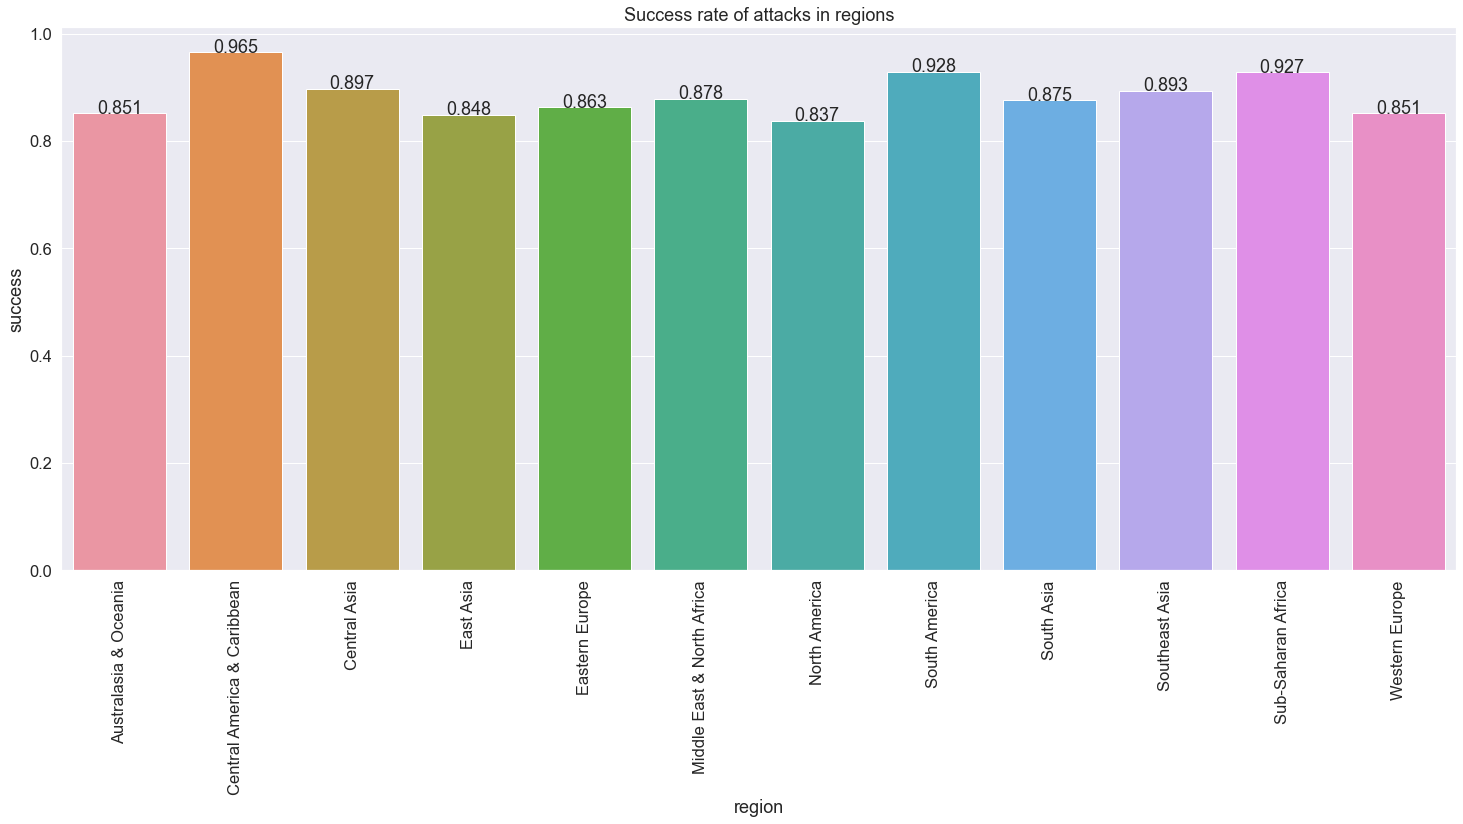

In [60]:
df_group_two = df1[['region','success']]
df_group_two = df_group_two.groupby(['region'],as_index=False).mean()

sb.set(font_scale=1.5)
plt.figure(figsize=[25,10])
ax=sb.barplot(x='region',y='success',data=df_group_two)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()+0.01), 
                   ha = 'center', va = 'center')

plt.title("Success rate of attacks in regions")
plt.xticks(rotation=90)
plt.show()

## Conclusion cntd. - 
As we can see in the above bar graph, the Central America & Caribbean region has the highest success rate among all the regions followed by South American and Saharan Africa regions. 

As we can see in the heatmap also, in the recent years ie 2012-2017 the success rate has been higher in almost all the regions, some of them have very fluctuating rates while some regions have been having constant rate thoroughout the years.


## Now lets look at the countries specifically for more details.

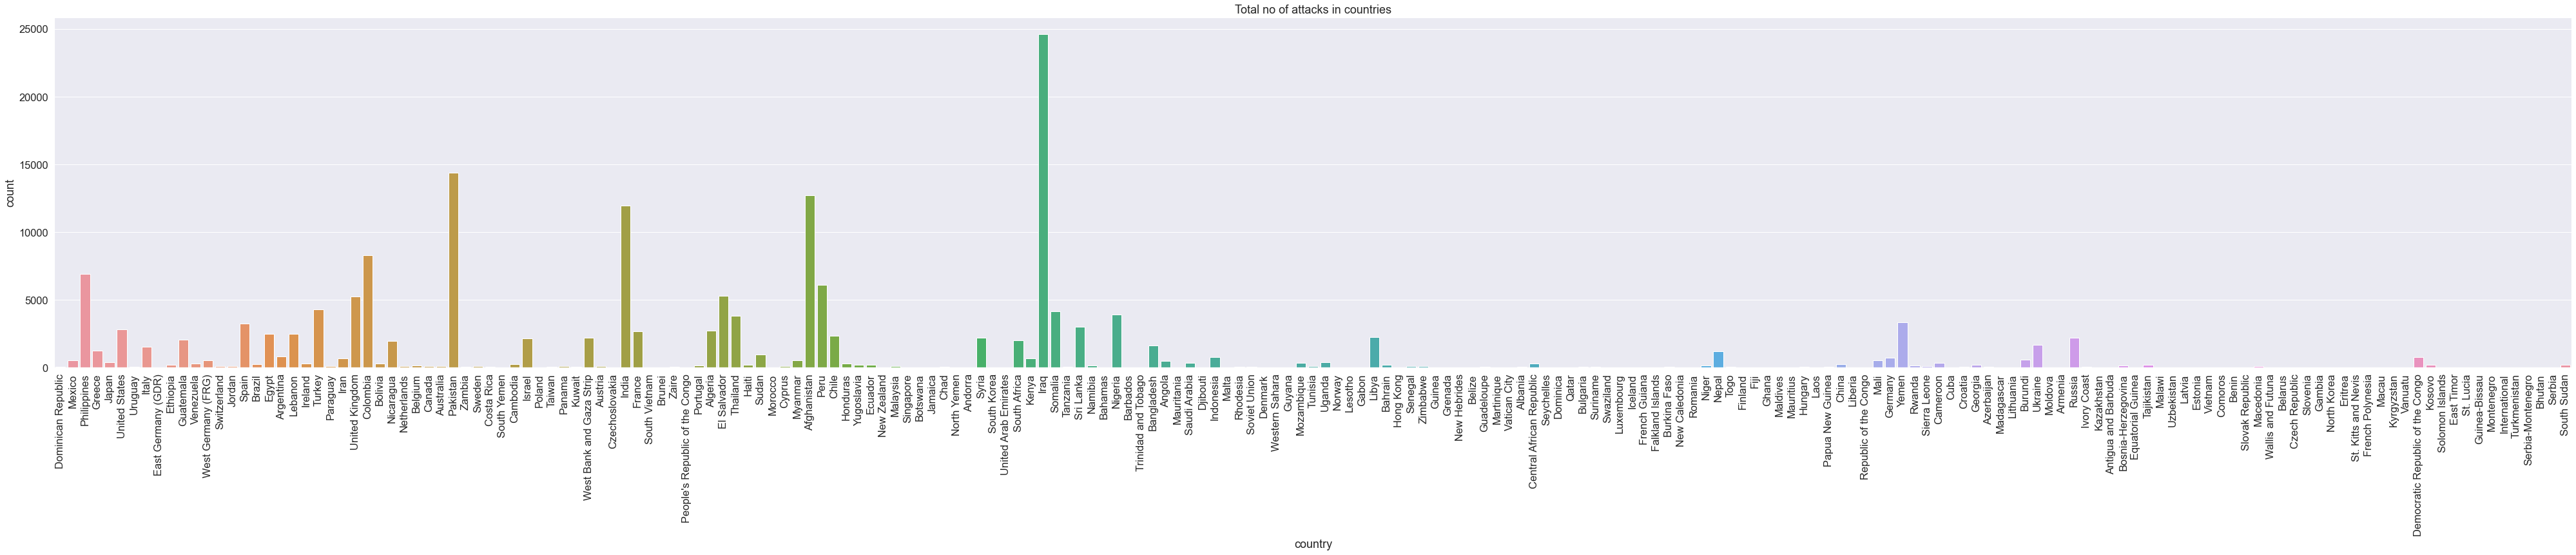

In [61]:
plt.figure(figsize=[70,10])
sb.countplot(x=df1['country'])
plt.title("Total no of attacks in countries")
plt.xticks(rotation=90)
plt.show()

## Conclusion cntd -

As we can see Iraq had the highest no of attacks from 1970 - 2017 followed by Pakistan, Afghanistan and India respectively. Hence we can say that these countries also fall under the hot targets of terrorism by the number of attacks that were carried out over the years.

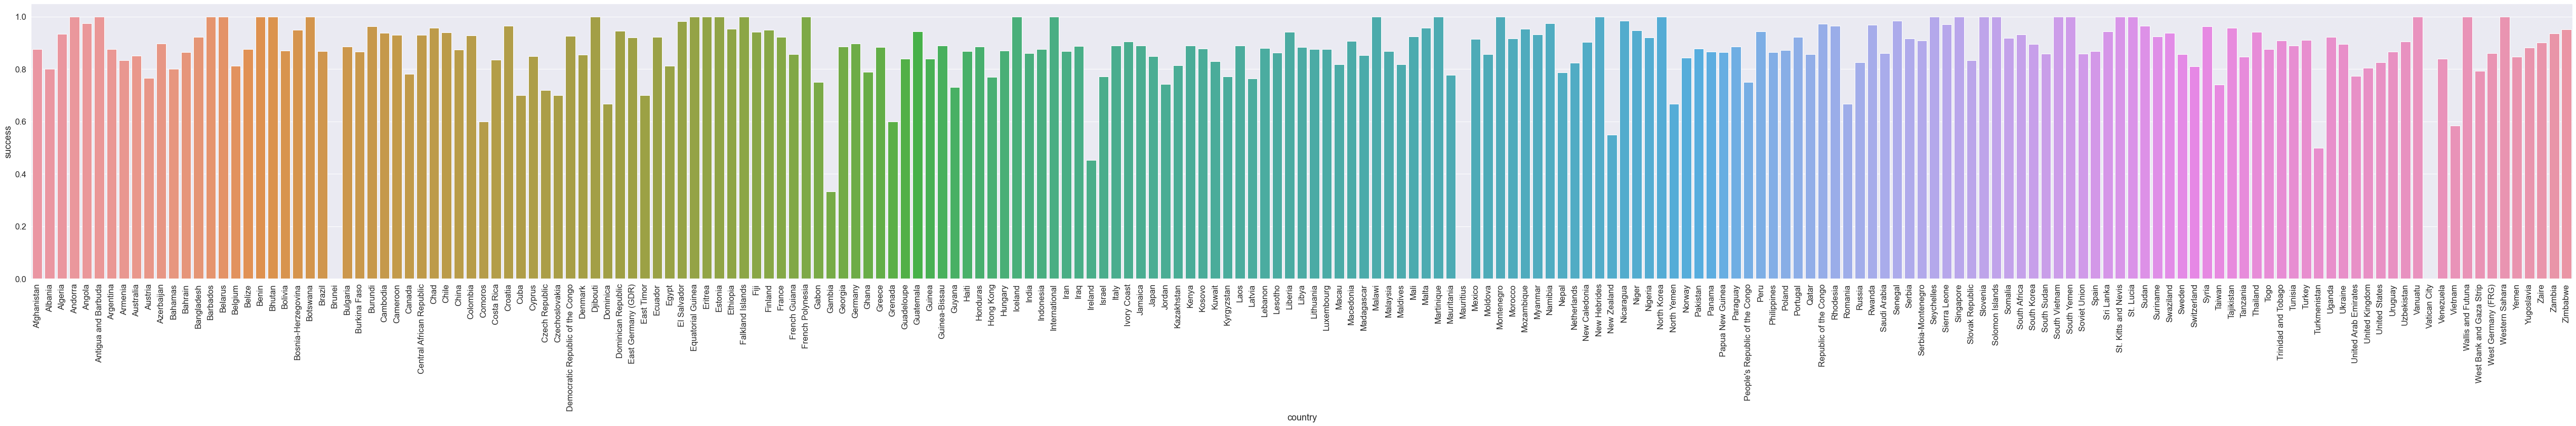

In [24]:
df_group_four = df1[['country','success']]
df_group_four = df_group_four.groupby(['country'],as_index=False).mean()

sb.set(font_scale=1.5)
plt.figure(figsize=[90,10])
ax=sb.barplot(x='country',y='success',data=df_group_four)
plt.xticks(rotation=90)
plt.show()

## Conclusion cntd -
As we can see in the bar graph there are many countries with success rate high while some with success rate almost equal to 1 over the years. The countries with lower success rate over the years are also there in the graph. To find out better analysis of terrorism details, taking only the countries with higher succcess rate would be more accurate.

In [25]:
# segregating the countries with overall success rate higher than 70%
df2_half = df_group_four.loc[df_group_four['success']>=0.7]
df2_half.head()

country   success
0  Afghanistan  0.875108
1      Albania  0.800000
2      Algeria  0.933649
3      Andorra  1.000000
4       Angola  0.973948

In [26]:
# We take out the data of the countries with avg success rate higher than 70% over the years
df2 = df1[df1['country'].isin(df2_half['country'])]
df2.head()

year  month  day             country  \
eventid                                              
197000000001  1970      7    2  Dominican Republic   
197000000002  1970      0    0              Mexico   
197001000001  1970      1    0         Philippines   
197001000002  1970      1    0              Greece   
197001000003  1970      1    0               Japan   

                                   region           city  specificity  \
eventid                                                                 
197000000001  Central America & Caribbean  Santo Domingo          1.0   
197000000002                North America    Mexico city          1.0   
197001000001               Southeast Asia        Unknown          4.0   
197001000002               Western Europe         Athens          1.0   
197001000003                    East Asia        Fukouka          1.0   

              vicinity  success                     attack_type  \
eventid                                                           
197000000001         0        1                   Assassination   
197000000002         0        1     Hostage Taking (Kidnapping)   
197001000001         0        1                   Assassination   
197001000002         0        1               Bombing/Explosion   
197001000003         0        1  Facility/Infrastructure Attack   

                                   target  \
eventid                                     
197000000001  Private Citizens & Property   
197000000002      Government (Diplomatic)   
197001000001          Journalists & Media   
197001000002      Government (Diplomatic)   
197001000003      Government (Diplomatic)   

                                            target-sub division  \
eventid                                                           
197000000001                                     Named Civilian   
197000000002  Diplomatic Personnel (outside of embassy, cons...   
197001000001                    Radio Journalist/Staff/Facility   
197001000002                                  Embassy/Consulate   
197001000003                                  Embassy/Consulate   

                     nationality                           gang name motive  \
eventid                                                                       
197000000001  Dominican Republic                              MANO-D    NaN   
197000000002             Belgium  23rd of September Communist League    NaN   
197001000001       United States                             Unknown    NaN   
197001000002       United States                             Unknown    NaN   
197001000003       United States                             Unknown    NaN   

             weapon type  no of killed  no of wounded  
eventid                                                
197000000001     Unknown      1.000000       0.000000  
197000000002     Unknown      0.000000       0.000000  
197001000001     Unknown      1.000000       0.000000  
197001000002  Explosives      2.403272       3.167668  
197001000003  Incendiary      2.403272       3.167668

In [27]:
df2.shape

(181313, 18)

In [28]:
df2['country'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
Falkland Islands           1
St. Lucia                  1
International              1
Antigua and Barbuda        1
Wallis and Futuna          1
Name: country, Length: 192, dtype: int64

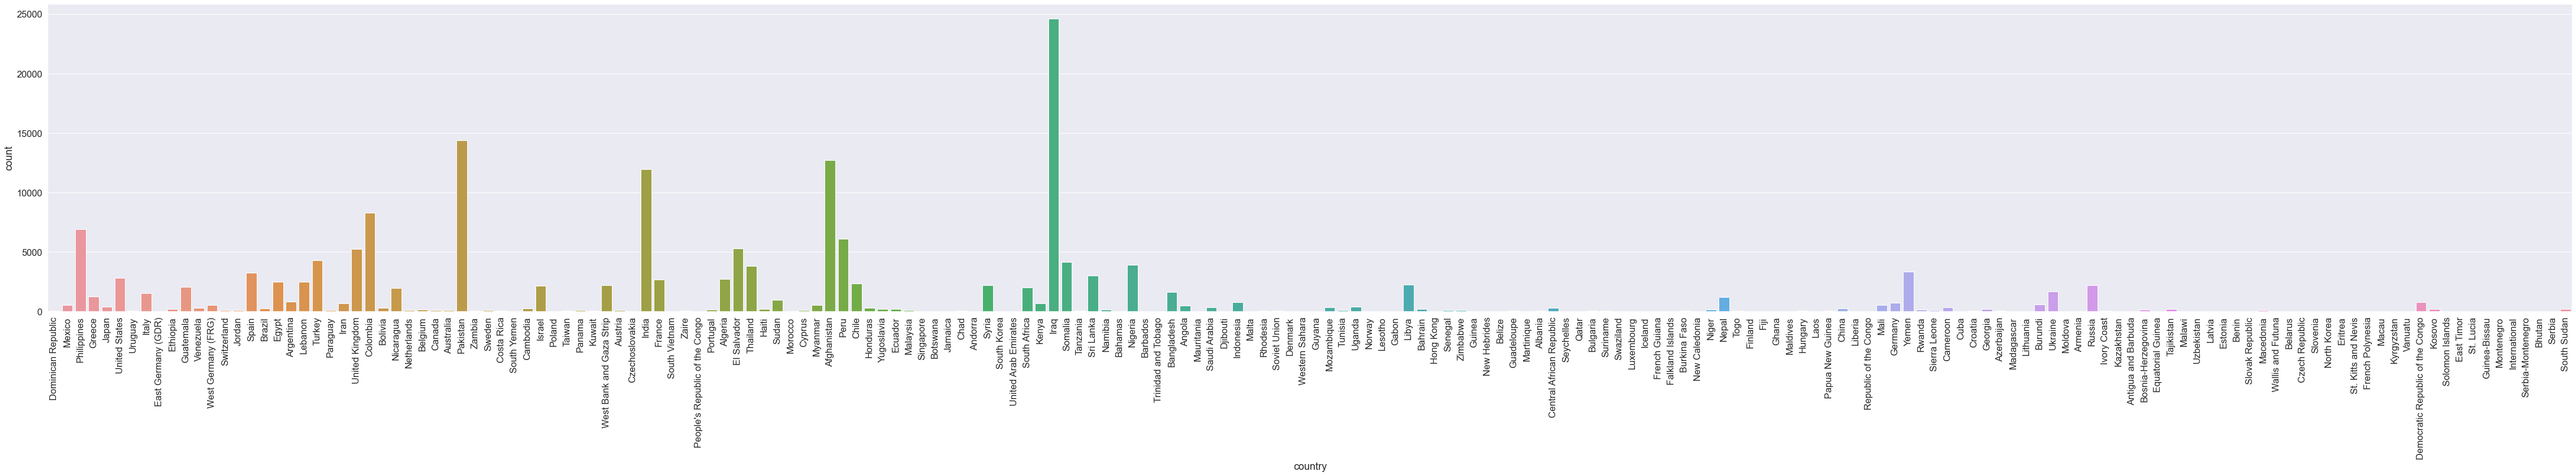

In [29]:
plt.figure(figsize=[80,10])
sb.countplot(x='country',data=df2)
plt.xticks(rotation=90)
plt.show()

 - After segregrating the countries the top 5 countries - Iraq, Pakistan, Afghanistan, India and Columbia are still the same as before hence proving that these are the most targetted terrorism zones in the world 

In [30]:
df2['city'].value_counts()

Unknown       9762
Baghdad       7589
Karachi       2652
Lima          2359
Mosul         2265
              ... 
Ain Merane       1
Rayong           1
Gurbuki          1
Saraun           1
Morphou          1
Name: city, Length: 36545, dtype: int64

 - As the values of lot of Cities is unknown, we cant figure out the accurate number of attacks in the cities but as we can Baghdad which is the capital of Iraq, is one of the highest attacked city again, Then follwed by Karachi which is the capital of Pakistan. 

## Lets analyze the data year wise before.

In [31]:
# we group the data and factors based on the year wise attacks

df2_group_year = df2[['year','specificity','vicinity','success','no of killed','no of wounded']]
df2_group_year = df2_group_year.groupby(['year'],as_index=False).mean()
df2_group_year.set_index('year',inplace=True)
df2_group_year.head()

specificity  vicinity   success  no of killed  no of wounded
year                                                              
1970     1.055385  0.007692  0.843077      0.421442       0.574694
1971     1.091489  0.004255  0.891489      0.693212       1.144988
1972     1.154122  0.007168  0.801075      1.193090       2.572266
1973     1.083156  0.004264  0.914712      1.031472       2.581862
1974     1.062392  0.000000  0.937608      1.116793       2.738116

In [32]:
df2_group_year.corr()

specificity  vicinity   success  no of killed  no of wounded
specificity       1.000000  0.479434  0.158236      0.631892       0.208784
vicinity          0.479434  1.000000  0.032325      0.590793       0.641686
success           0.158236  0.032325  1.000000      0.204843       0.146563
no of killed      0.631892  0.590793  0.204843      1.000000       0.748871
no of wounded     0.208784  0.641686  0.146563      0.748871       1.000000

<AxesSubplot:xlabel='specificity', ylabel='no of killed'>

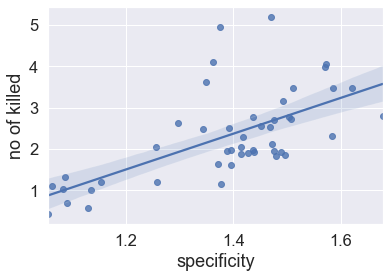

In [33]:
sb.regplot(x='specificity',y='no of killed',data=df2_group_year)

<AxesSubplot:xlabel='specificity', ylabel='success'>

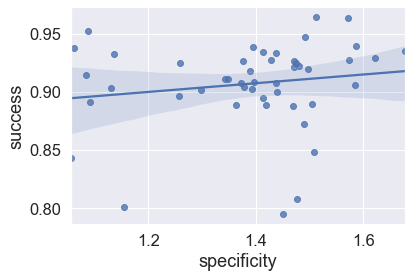

In [34]:
sb.regplot(x='specificity',y='success',data=df2_group_year)

<AxesSubplot:xlabel='success', ylabel='no of killed'>

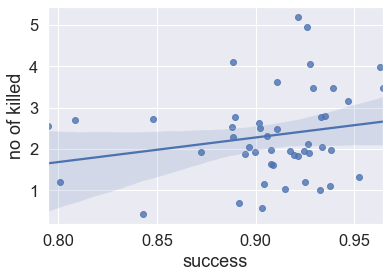

In [35]:
sb.regplot(x='success',y='no of killed',data=df2_group_year)

<AxesSubplot:xlabel='success', ylabel='no of wounded'>

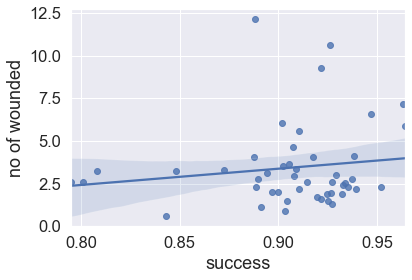

In [62]:
sb.regplot(x='success',y='no of wounded',data=df2_group_year)

<AxesSubplot:>

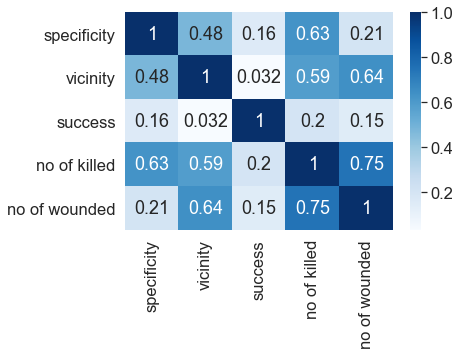

In [36]:
sb.heatmap(df2_group_year.corr(),cmap='Blues',annot=True)

## Conclusion cntd - 

As we can see in the above graphs and heatmap, specifity and no of killed has a high +ve correlation.Also, vicinity and no of wounded has a high +ve correlation. This states that the deaths is higher in attacks with higher specifity of targeted location while no of wounded id higher when the attacks occurred in the vicinity of the target location. Hence the maginitude of the attacks with the higher specificity were higher as compared to those in vicinity. 

Another thing to note here is there is very low or no correlation between specifity/vicinity and success. Hence, the success of the attack cannot be defined by the specificity or vicitnity of the attack at the targetted location. It can neither be defined by the no of killed/wounded in the attacks. 

Text(0.5, 1.0, 'Year v/s no of target location specific attacks')

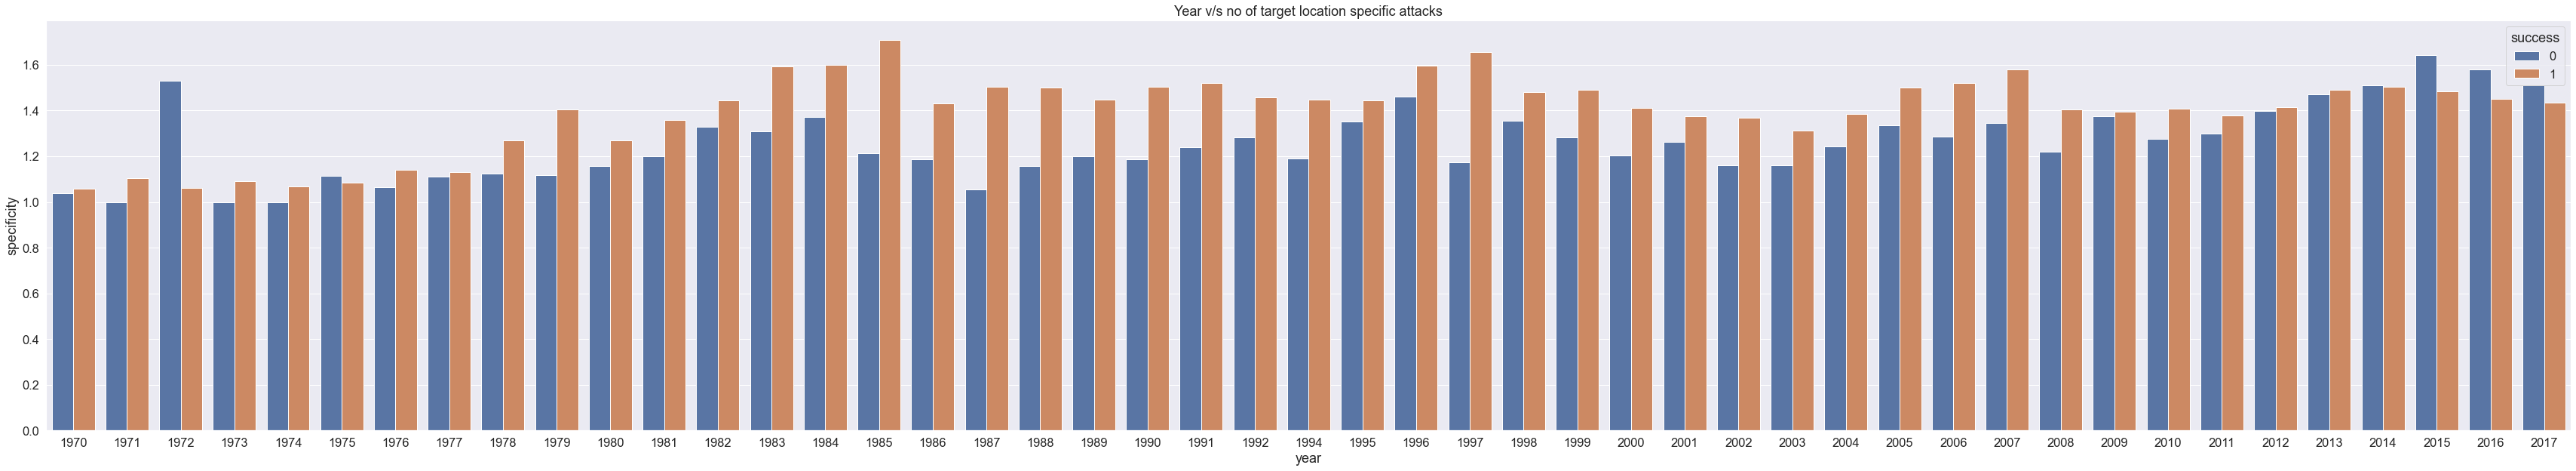

In [65]:
# no of successful attacks in specific targeted locations
plt.figure(figsize=[60,10])
sb.barplot(x='year',y='specificity',hue='success',data=df2,ci=None)
plt.title("Year v/s no of target location specific attacks")

Text(0.5, 1.0, 'Year v/s no of target location vicinity attacks')

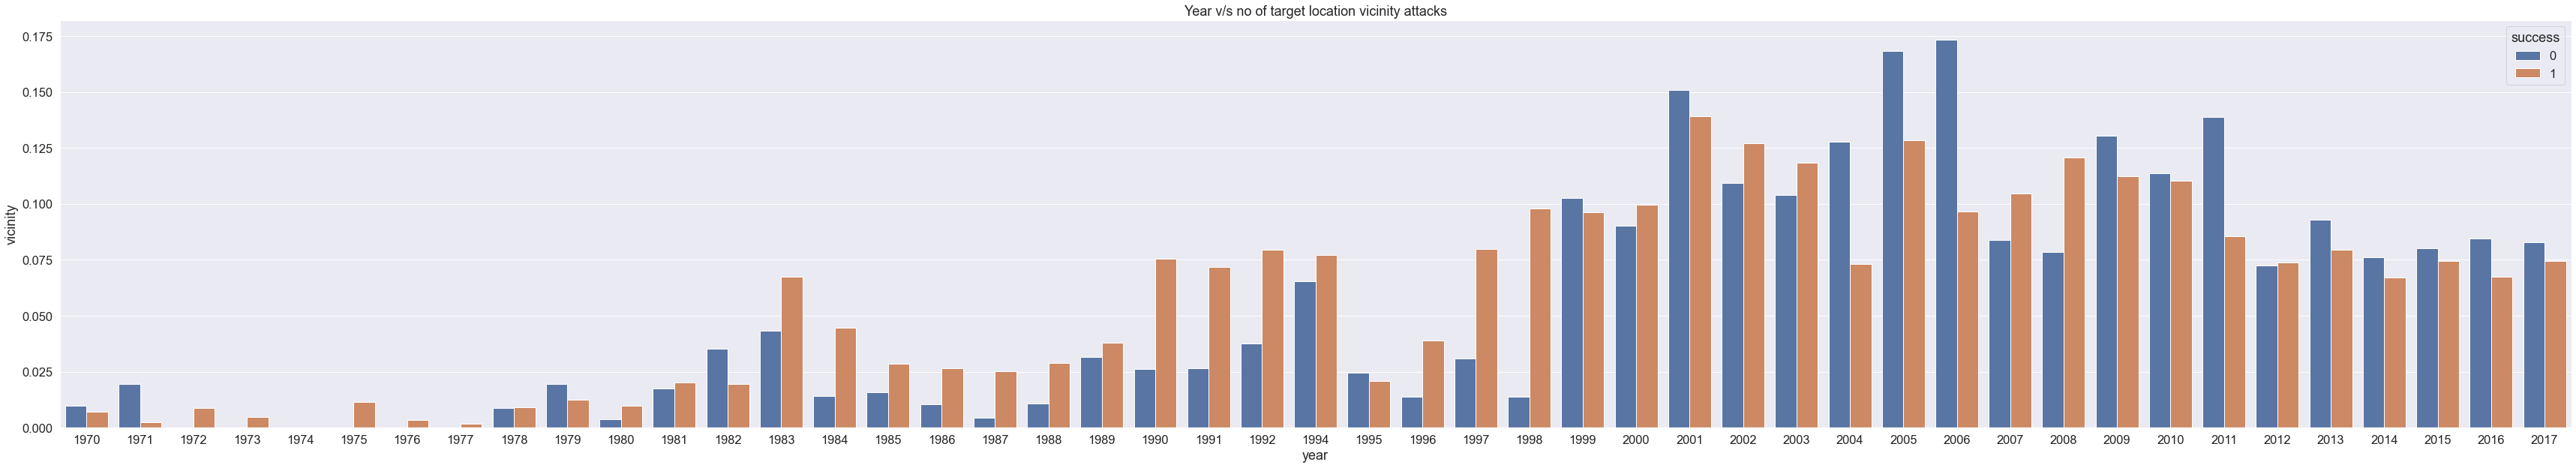

In [66]:
# no of successful attacks in vicinity of targeted locations
plt.figure(figsize=[60,10])
sb.barplot(x='year',y='vicinity',hue='success',data=df2,ci=None)
plt.title("Year v/s no of target location vicinity attacks")

Text(0.5, 1.0, 'Total no of killed per year in attacks')

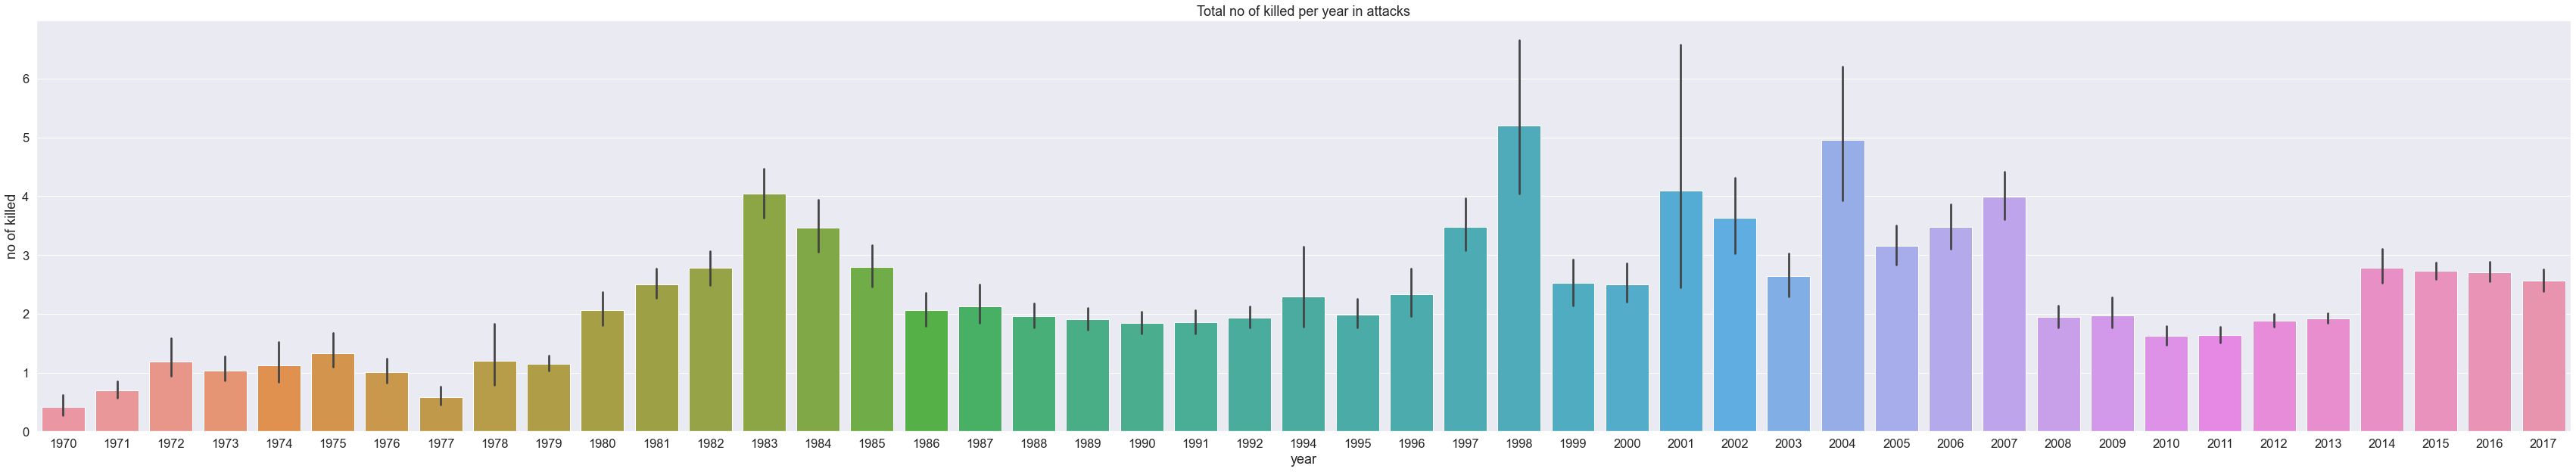

In [67]:
plt.figure(figsize=[60,10])
sb.barplot(x='year',y='no of killed',data=df2)
plt.title("Total no of killed per year in attacks")

Text(0.5, 1.0, 'Total no of killed in both successful and not successful attacks per year')

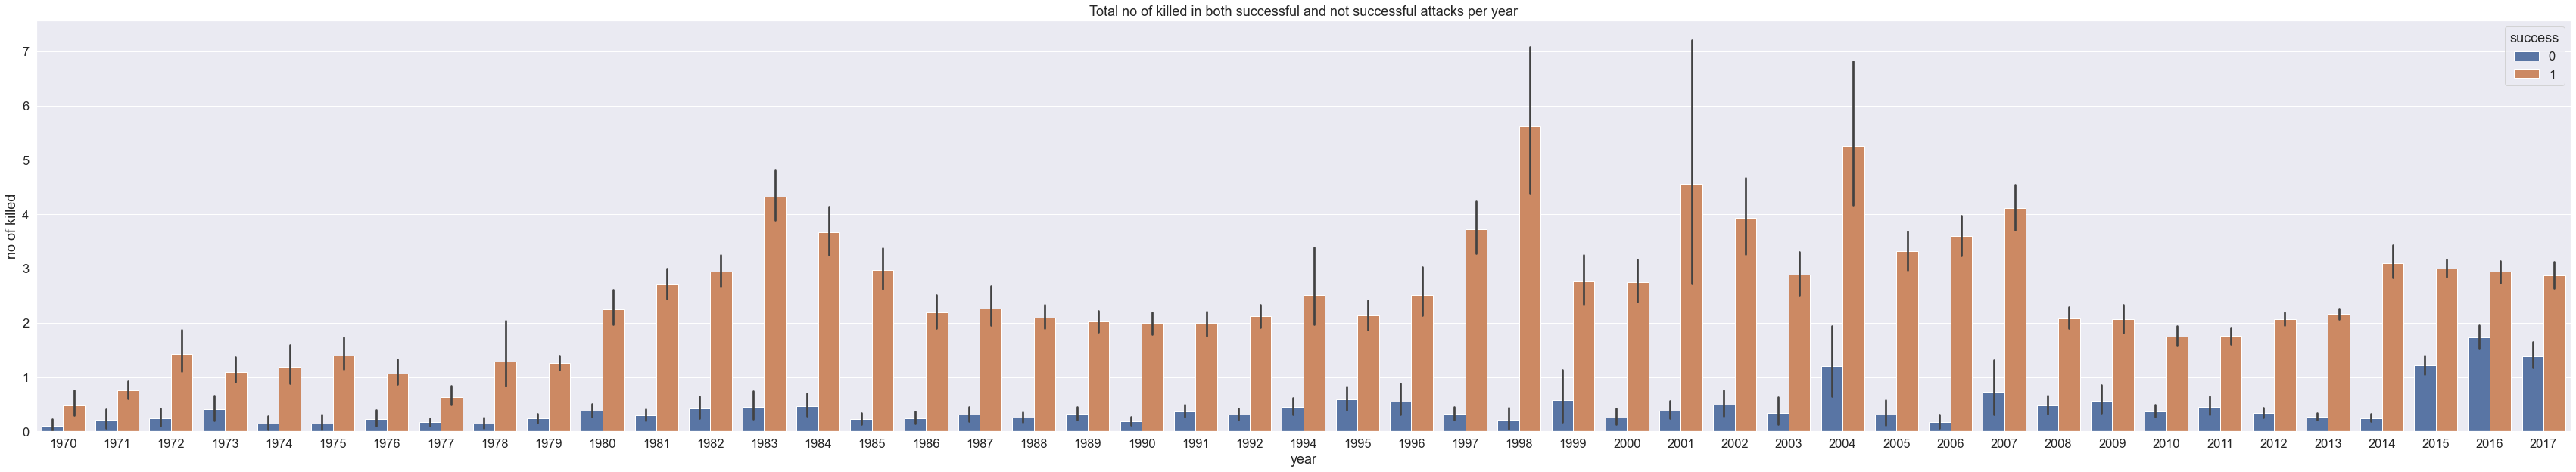

In [69]:
plt.figure(figsize=[60,10])
sb.barplot(x='year',y='no of killed',hue='success',data=df2)
plt.title("Total no of killed in both successful and not successful attacks per year")

Text(0.5, 1.0, 'Total no of wounded in both successful and not successful attacks per year')

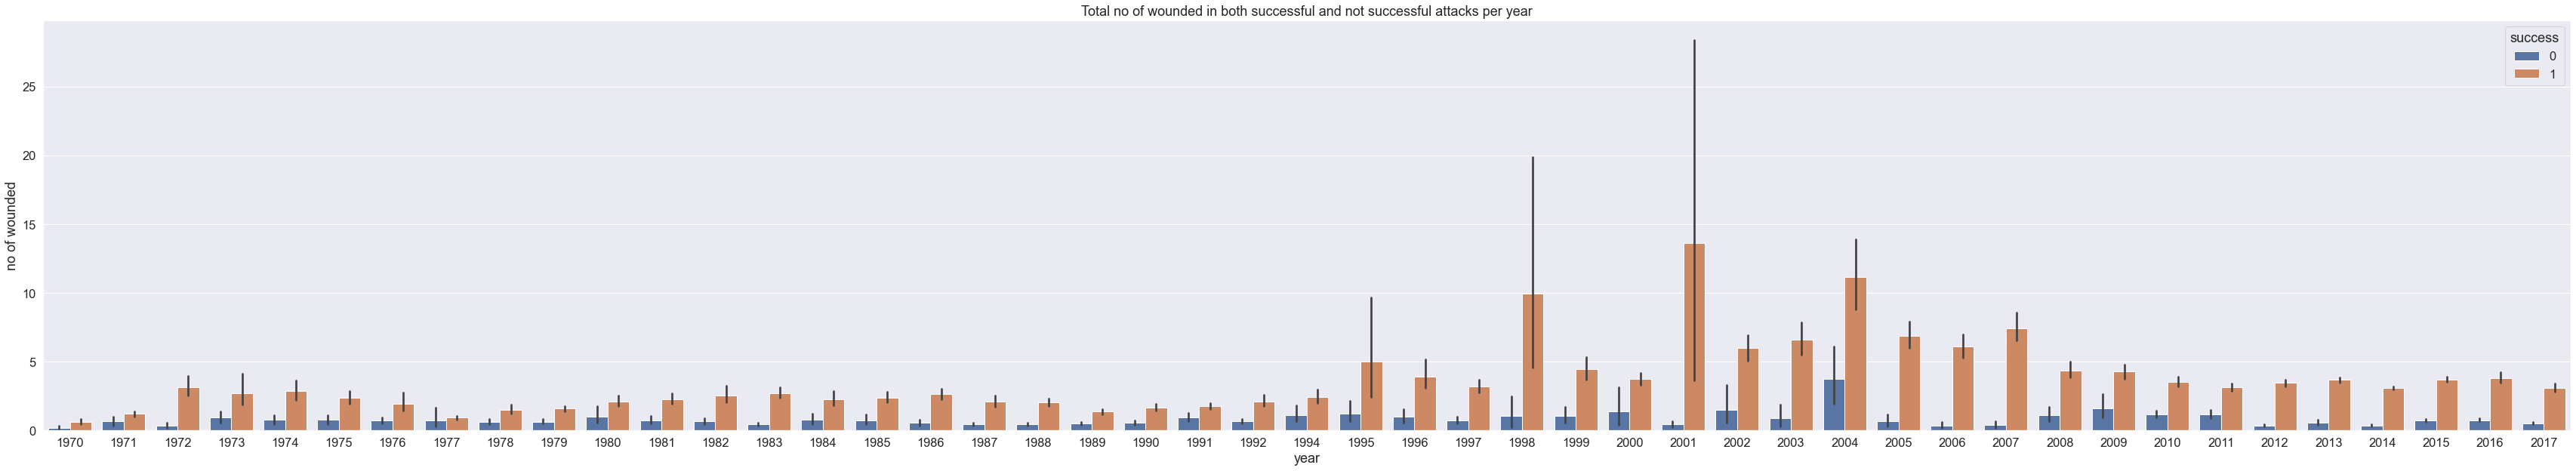

In [70]:
plt.figure(figsize=[60,10])
sb.barplot(x='year',y='no of wounded',hue='success',data=df2)
plt.title("Total no of wounded in both successful and not successful attacks per year")

## Lets analyze the data country wise now.

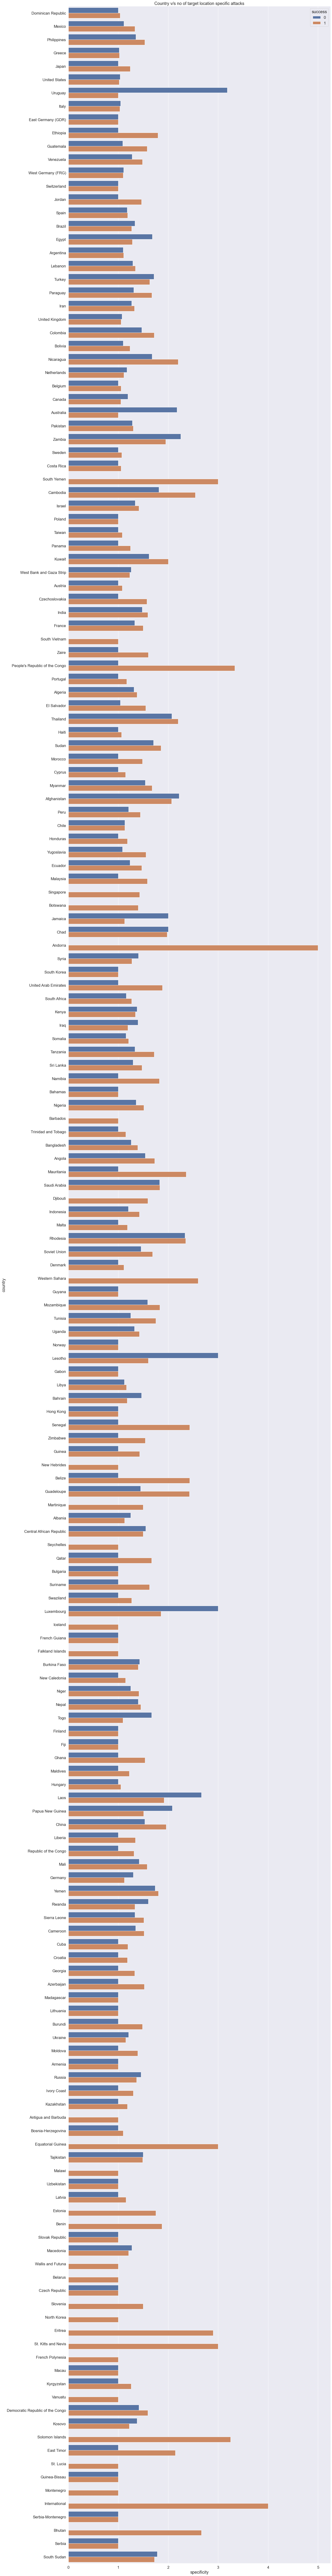

In [71]:
# no of successful attacks in specific targeted locations
plt.figure(figsize=[20,200])
sb.barplot(y='country',x='specificity',hue='success',data=df2,ci=None)
plt.title("Country v/s no of target location specific attacks")
plt.show()

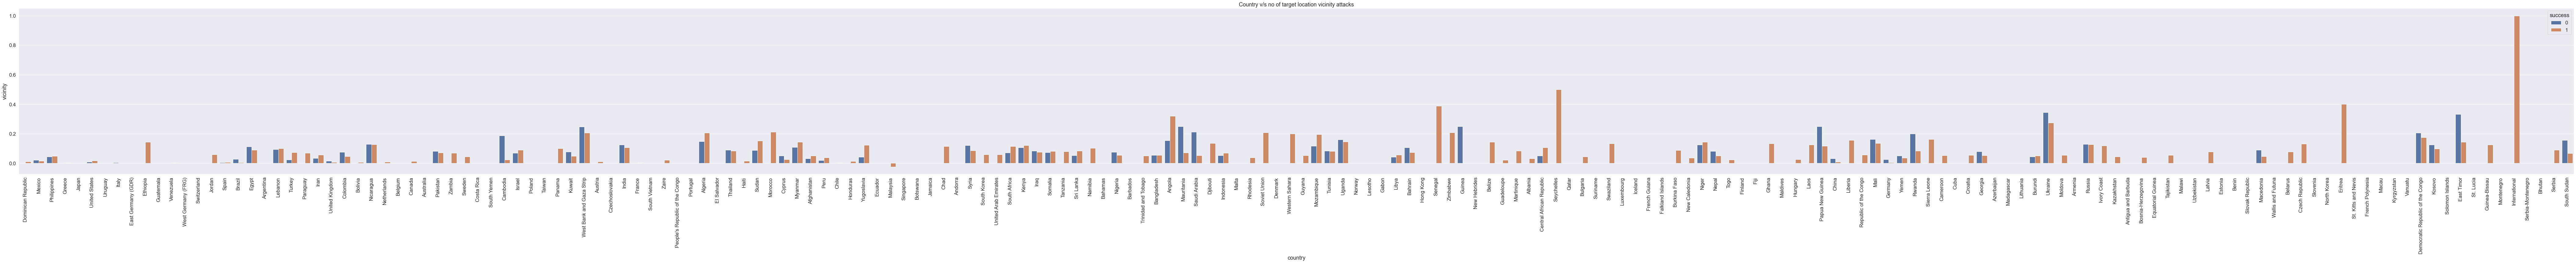

In [72]:
# no of successful attacks in the vicnity of targeted locations
plt.figure(figsize=[150,10])
sb.barplot(x='country',y='vicinity',hue='success',data=df2,ci=None)
plt.title("Country v/s no of target location vicinity attacks")
plt.xticks(rotation=90)
plt.show()

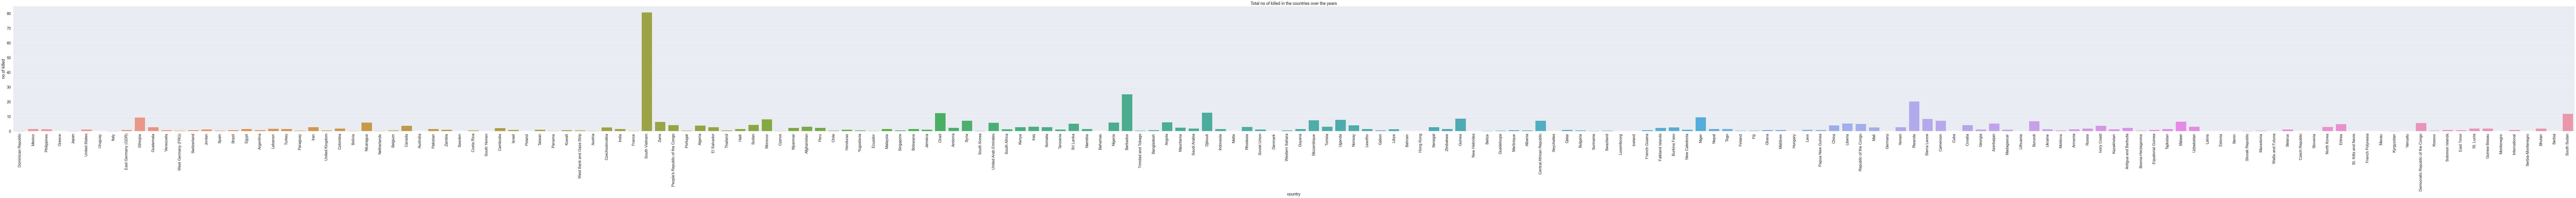

In [73]:
plt.figure(figsize=[200,10])
sb.barplot(x='country',y='no of killed',data=df2,ci=None)
plt.title("Total no of killed in the countries over the years")
plt.xticks(rotation=90)
plt.show()

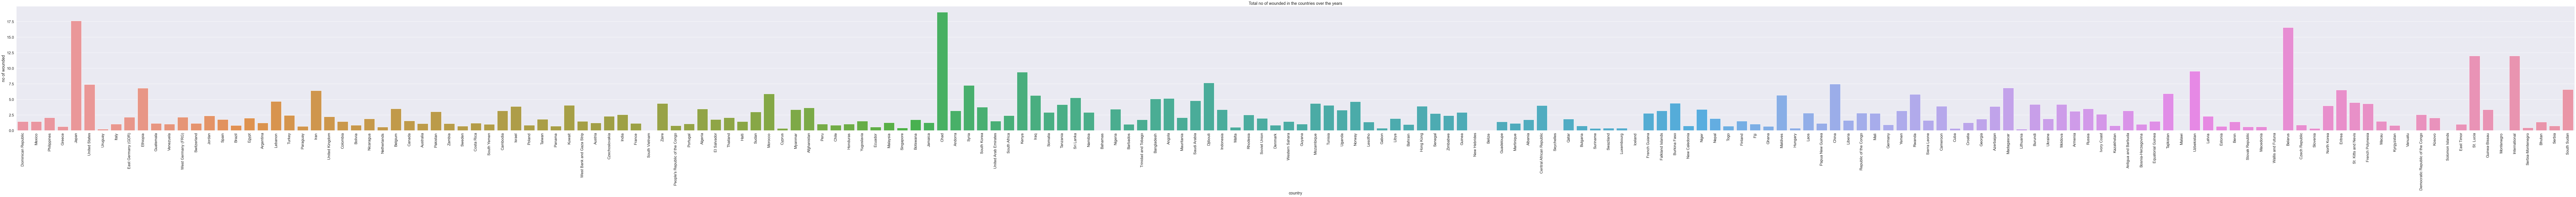

In [74]:
plt.figure(figsize=[200,10])
sb.barplot(x='country',y='no of wounded',data=df2,ci=None)
plt.title("Total no of wounded in the countries over the years")
plt.xticks(rotation=90)
plt.show()

## Lets see more information about the attacks in the data

- There are a lot of unknown values present in the categorical data. These values cannot be assumed and visualized. These values should be confirmed and verfied from the source of data collection and then proceeded to move futher for more accurate analysis.

<AxesSubplot:xlabel='attack_type', ylabel='count'>

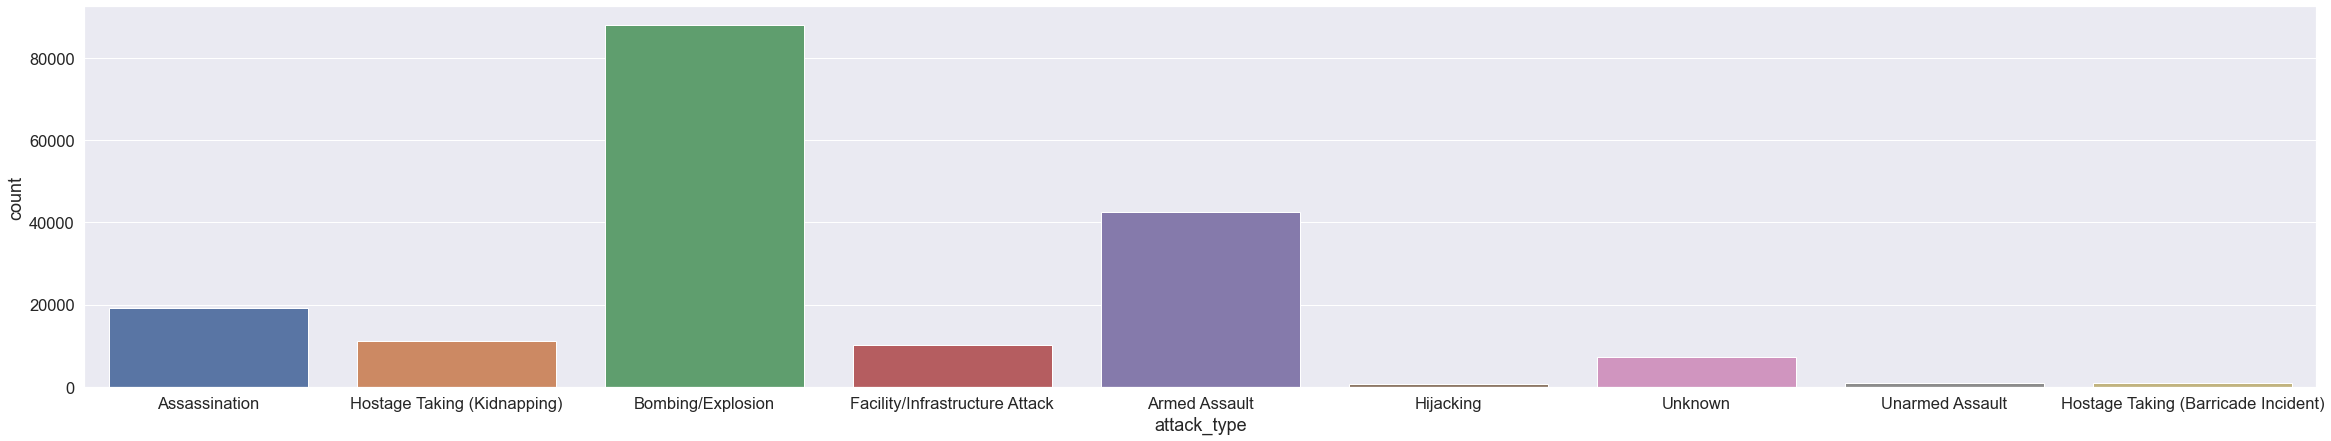

In [50]:
plt.figure(figsize=[40,7])
sb.countplot(x=df2['attack_type'])

<AxesSubplot:xlabel='attack_type', ylabel='count'>

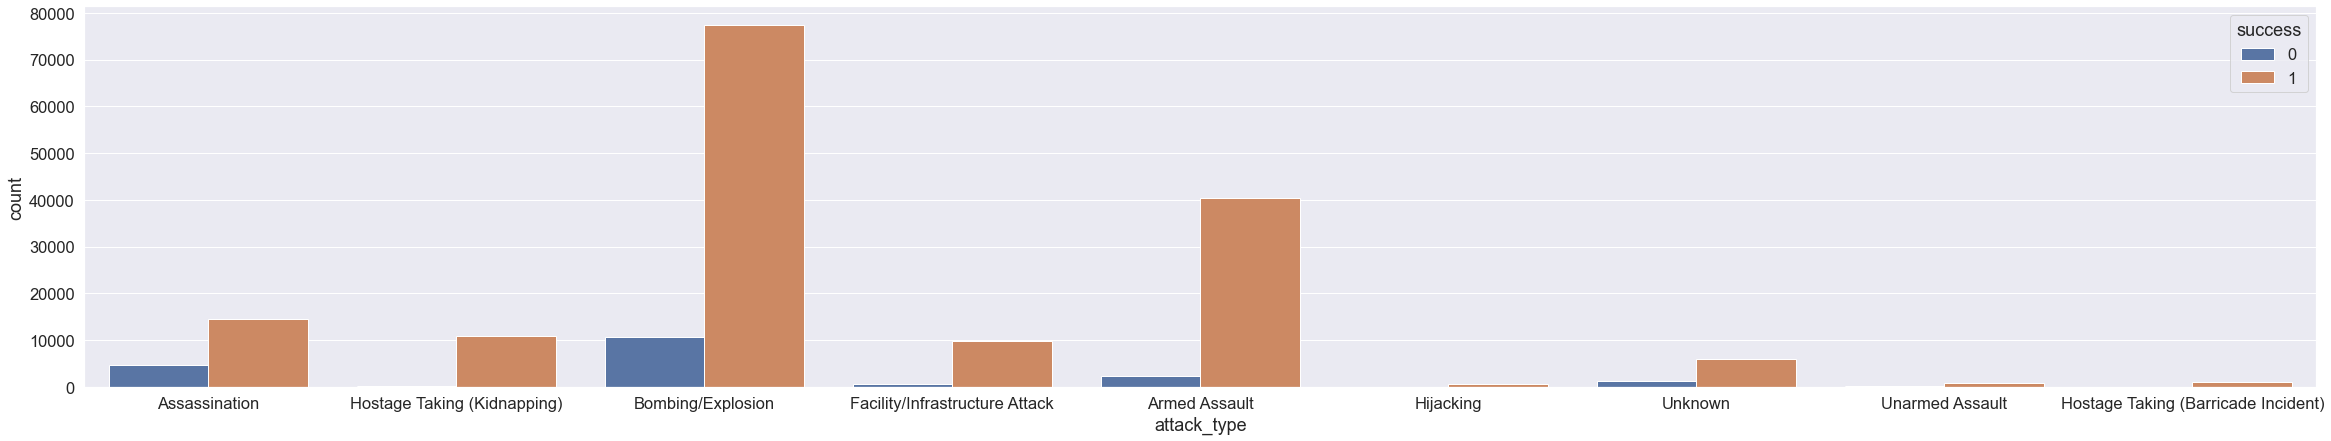

In [51]:
plt.figure(figsize=[40,7])
sb.countplot(x=df2['attack_type'],hue=df2['success'])

## Conclusion cntd -

 - As we can see the most common attack type being used is Bombing/explosion and armed assault. The most successful attack type is also bombing/explosin.

<AxesSubplot:xlabel='target', ylabel='count'>

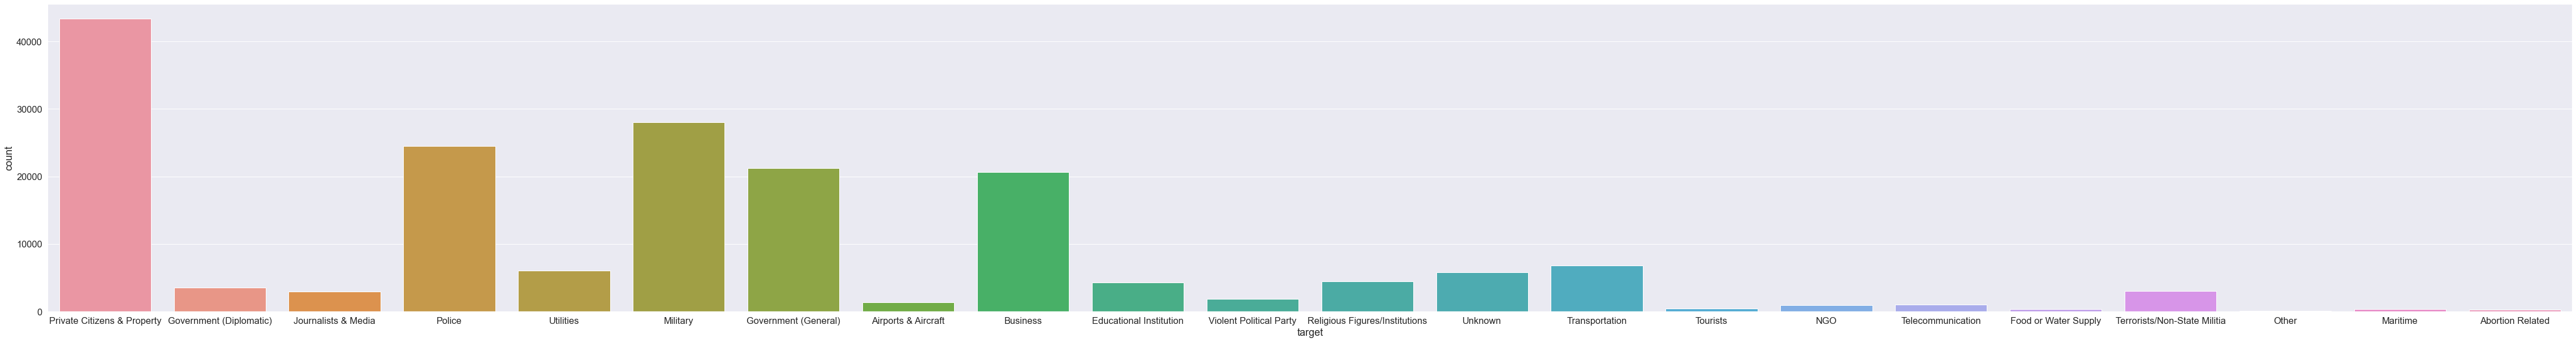

In [52]:
plt.figure(figsize=[80,10])
sb.countplot(x=df2['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

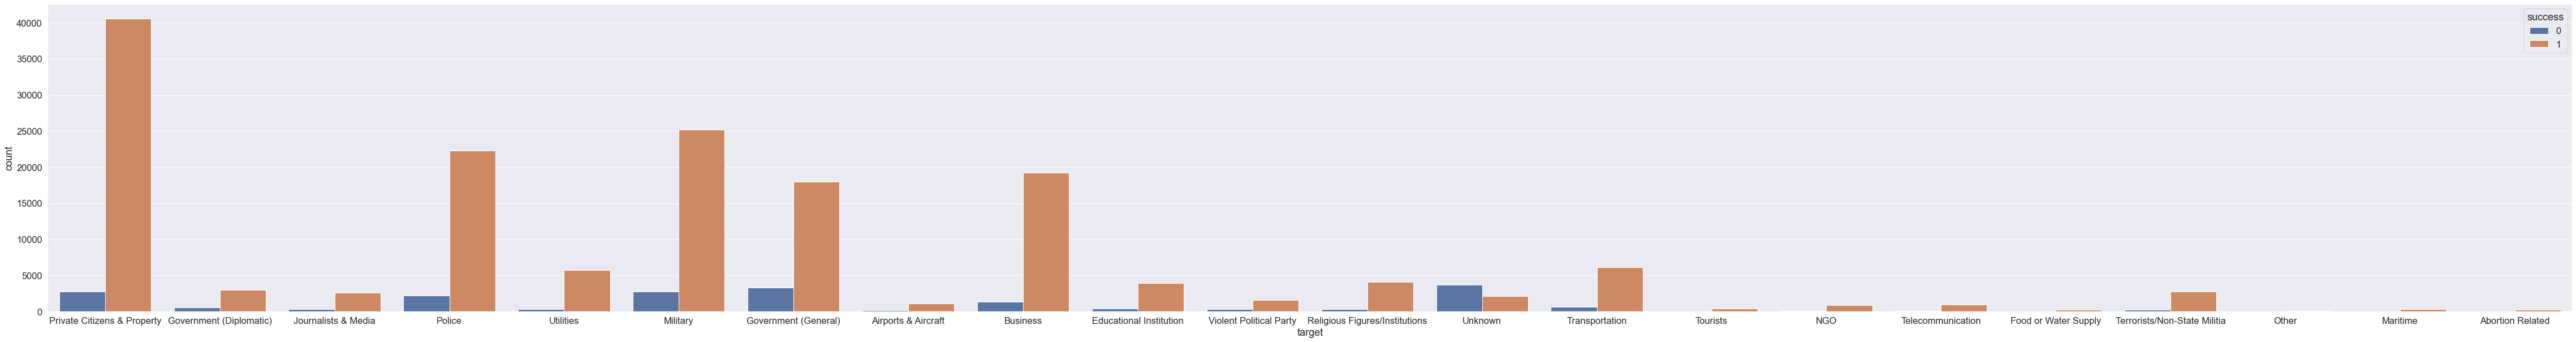

In [53]:
plt.figure(figsize=[80,10])
sb.countplot(x=df2['target'],hue=df2['success'])

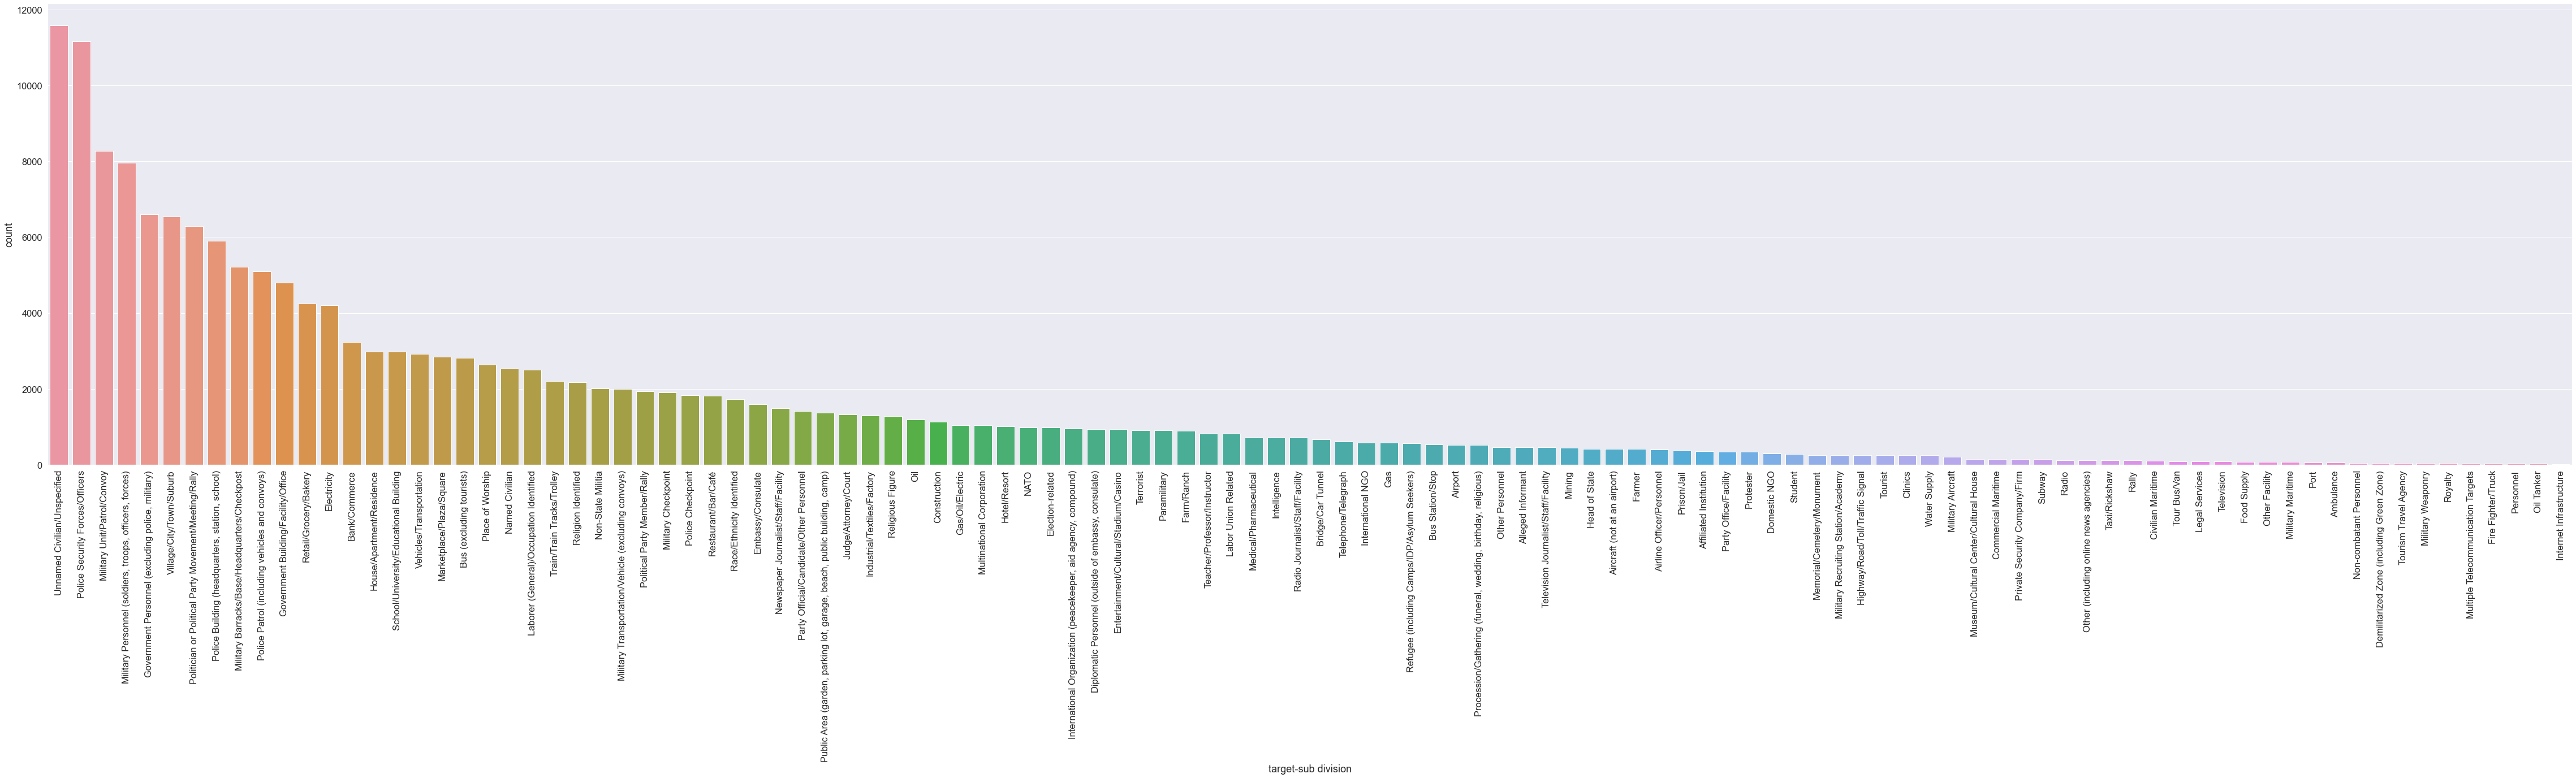

In [54]:
plt.figure(figsize=[80,15])
sb.countplot(x='target-sub division', 
             data=df2,
             #hue = df2_group_year['target'],
             order = df2['target-sub division'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

 - As we can see most common target of these attacks is private/common citizens or properties. Then comes the military and police forces. 
 - Most coomon Sub-targets are civilians, police force & officers. Then comes millitary units,government officals and other target subdivisions under each target.

In [55]:
df2['weapon type'].value_counts()

Explosives                                                                     92237
Firearms                                                                       58453
Unknown                                                                        15145
Incendiary                                                                     11053
Melee                                                                           3645
Chemical                                                                         308
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      135
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

<AxesSubplot:xlabel='weapon type', ylabel='count'>

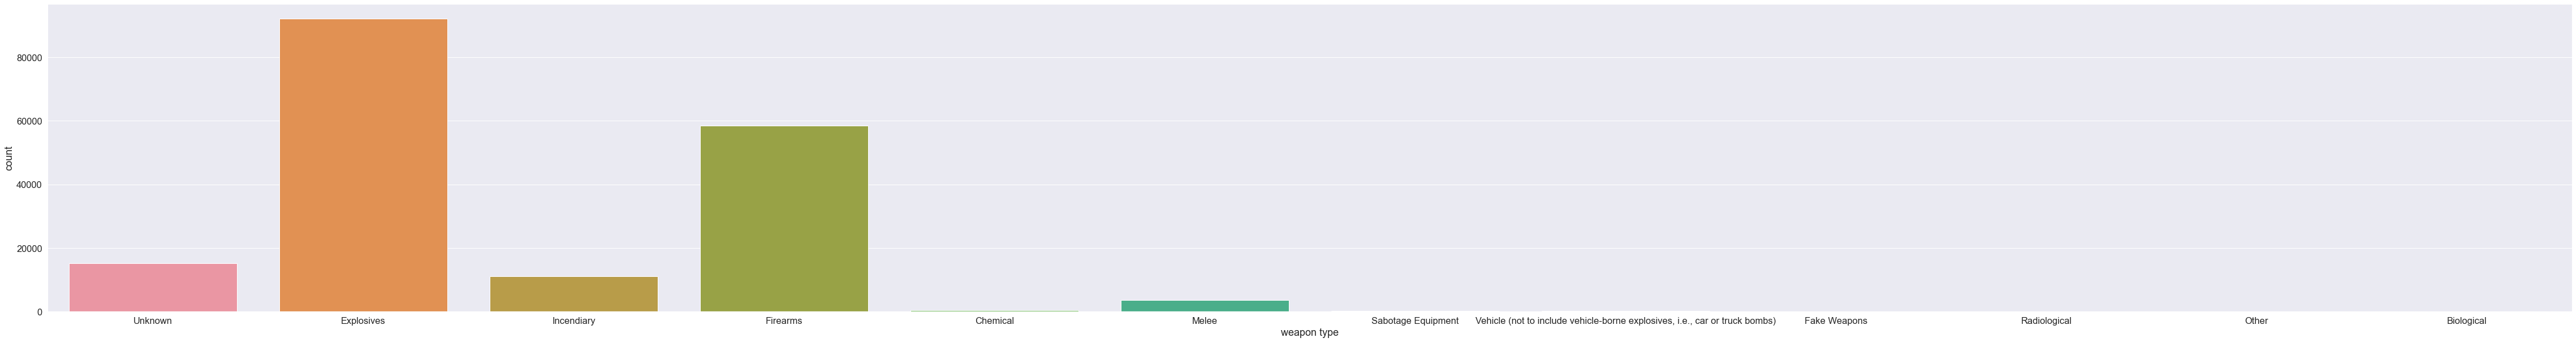

In [56]:
plt.figure(figsize=[80,10])
sb.countplot(x=df2['weapon type'])

 - As we can see above the most common type of attack is bombong or explosion and then armed assault. Hence we can see the highest type of weapon being used is Explosives and then Firearms and others.

In [57]:
df2['gang name'].value_counts()

Unknown                                             82566
Taliban                                              7477
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Republican People's Party                               1
Ticuna Indian                                           1
Anti-Communist Viets Organization                       1
Revolutionary United Front Movement                     1
February 27 Revolutionary Armed Forces                  1
Name: gang name, Length: 3533, dtype: int64

 - As we can see the very few gang names have been recognized in the attacks in the past years. The data is missing for most of values of this column, hence any sort of visualization would not be accurate till we recieve the proper data of all the attacks.
 - But as we can see in the apart from the unknown, Taliban and ISIL groups have been recognized for undertaking the highest no of attacks across these years.

In [58]:
df2['motive'].value_counts()

Unknown                                                                                                                                                                                                                                                                                         14881
The specific motive for the attack is unknown.                                                                                                                                                                                                                                                  14414
The specific motive is unknown; however, sources noted that the attack may have been part of a larger trend of violence related to Bangladesh's nationwide hartal, which began on January 6, 2015.                                                                                                297
The specific motive for the attack is unknown..                                                                       

- Same as the gang name, Motive column also has data that have not been recognized in the attacks in the past years. Only very few specific events have a clear motive data. Hence any sort of visualization would not be correct till we recieve the proper data of all the attacks.


# End.